<a href="https://www.kaggle.com/code/ziadhamed/linear-regression-with-graphs?scriptVersionId=216321245" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf

In [2]:
var = tf.random.uniform(shape=[1])

In [3]:
print(var)

tf.Tensor([0.681972], shape=(1,), dtype=float32)


In [4]:
def dataCreation(w=0.1,b=0.5,n=100):
  x = tf.random.uniform(shape=[n,1])
  noise =tf.random.normal(shape=[n,1], mean=0.0, stddev=0.01)
  y = w*x + b + noise
  return x.numpy(), noise.numpy() , y.numpy()

In [5]:
x, noise, y= dataCreation(n=100)

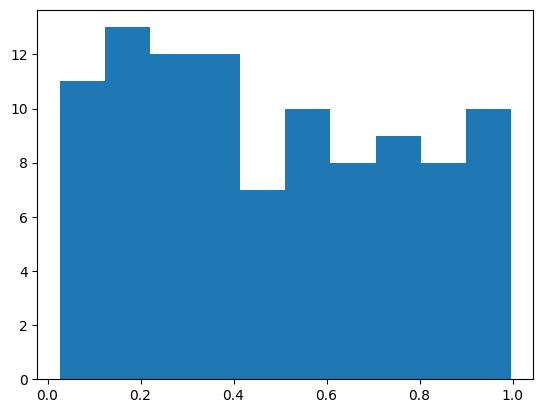

In [6]:
# % matplotlip inline
import matplotlib.pyplot as mplt
mplt.hist(x)
mplt.show()

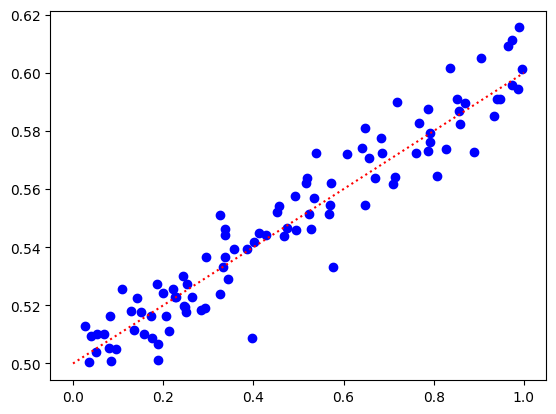

In [7]:
w, b = 0.1, 0.5
mplt.plot(x,y, 'bo')
mplt.plot([0,1],[0*w+b,1*w+b],'r:')

In [8]:
w_guess = 0
b_guess = 0
def pridect(x):
  y = w_guess*x + b_guess
  return y

In [9]:
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

In [10]:
print(loss(y, pridect(x)))

tf.Tensor(0.3015708, shape=(), dtype=float32)


In [11]:
w_guess = 0.01
b_guess = 0.5
print(loss(y, pridect(x)))

tf.Tensor(0.0026912328, shape=(), dtype=float32)


In [12]:
w_guess = 1
b_guess = -5
print(loss(y, pridect(x)))

tf.Tensor(25.80618, shape=(), dtype=float32)


In [13]:
w = tf.Variable(0.0)
b = tf.Variable(0.0)
def pridect(x):
  y = w*x + b
  return y
learning_rate = 0.1
steps =  200
for step in range(steps):
  with tf.GradientTape() as tape:
    predictions = pridect(x)
    loss_value = loss(y, predictions)

  gradients = tape.gradient(loss_value, [w, b])
  w.assign_sub(gradients[0]*learning_rate)
  b.assign_sub(gradients[1]*learning_rate)
  if step % 20==0:
    print("Step {} loss {}".format(step,loss_value))


Step 0 loss 0.3015708029270172
Step 20 loss 0.0008049022872000933
Step 40 loss 0.0005008095758967102
Step 60 loss 0.00032590318005532026
Step 80 loss 0.00022419934975914657
Step 100 loss 0.00016506105021107942
Step 120 loss 0.00013067359395790845
Step 140 loss 0.00011067825107602403
Step 160 loss 9.905156912282109e-05
Step 180 loss 9.229081479134038e-05


In [14]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.110403076>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4955702>


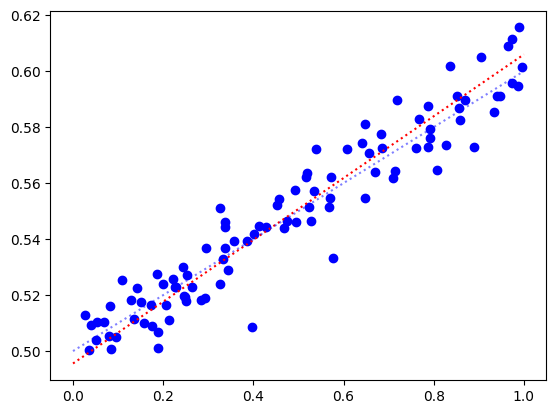

In [15]:
w_true, b_true = 0.1, 0.5
mplt.plot(x,y, 'bo')
mplt.plot([0,1],[0*w+b,1*w+b],'r:')
mplt.plot([0,1],[0*w_true+b_true,1*w_true+b_true],'b:',alpha = 0.5)

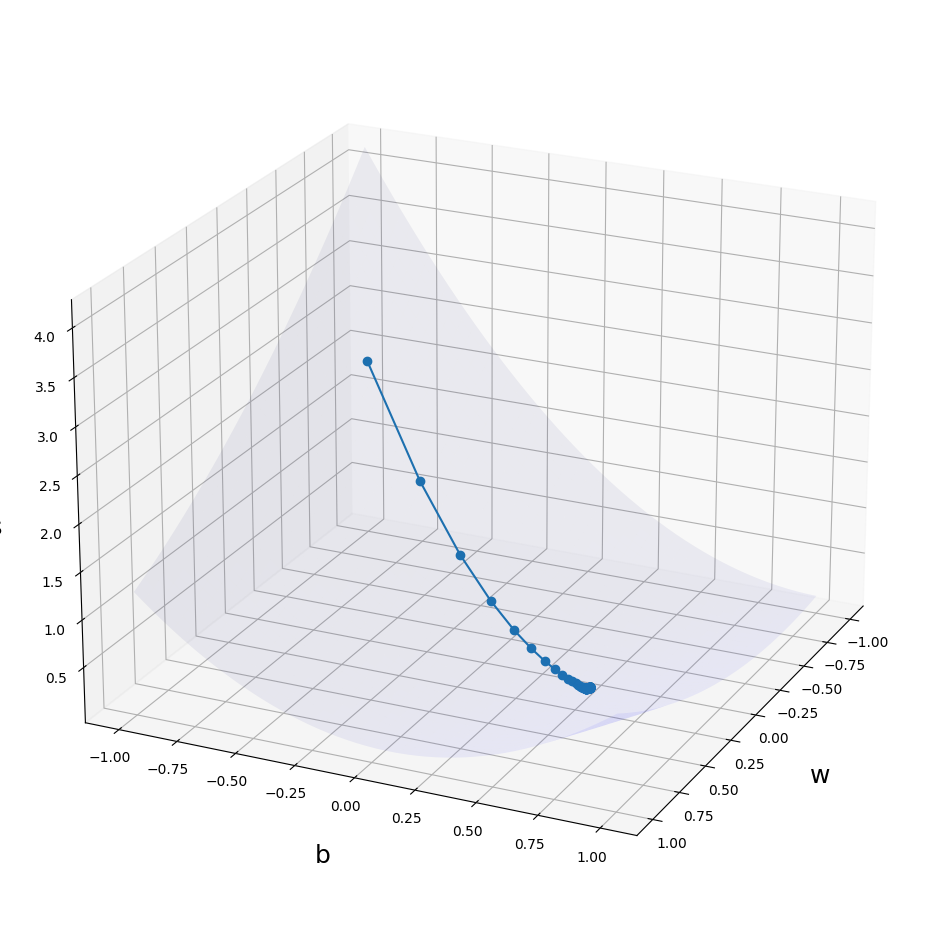

In [16]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * x + b
    loss_value = loss(y, pridect(x))
    return loss_value


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = mplt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = pridect(x)
        loss_value = loss(predictions, y)
    gradients = tape.gradient(loss_value, [w, b])
    history.append((w.numpy(), b.numpy(), loss_value.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
mplt.show()